## Data_Visualization_EIS.ipynb
#### Analyzes EIS Data from Big Kahuna for Convenient Feedback.
##### Miles Smith
##### 19 September 2023

In [3]:
import glob
import os
import math
import statistics
import matplotlib.pyplot as plt
import numpy as np
from impedance import preprocessing
from impedance.models.circuits import CustomCircuit
# Note that altair was downgraded to v3.0 for impedance.
from impedance.visualization import plot_nyquist, plot_residuals
from impedance.validation import linKK


### Read in all file names in EIS folder ###

# Specify the directory path and file extension pattern
directory_path = '/Users/milessmith/Documents/GitHub/mit-tri-robot/eis_sample_data' # Miles MacBook Pro (for testing)
# directory_path = 'C:\EIS' # Unchained Labs computer USE THIS DIRECTORY PATH IN 6-020
extension_pattern = '*.txt'  # List .txt files, for example

# Get a list of file names matching the pattern in the directory
path_names = glob.glob(os.path.join(directory_path, extension_pattern))

### Select files of interest ###

'''
Example File structure: 103965_5_20230918_073125_25.txt
Plate Number: 103965
Vial Number (?): 5
Date: 20230918
Vial Code (?): 073125
Temperature (degC): 25
'''

### NOTICE: The underscores are an important aspect of the strings for temp and vial number. ###
# plate_number = '103965_'
plate_number = "skip"

# vial_number = '_5_' # YOU CAN FILTER BY VIAL NUMBER
vial_number = "skip"

# NOTE: Some of the dates are incorrect, so it might be good to configure the code to look at two dates. 
date1 = '_20230918_' # PICK THE DATE OF THE SAMPLE YOU ARE INTERESTED
# date1 = "skip"
date2 = '_20230918_'
# date2 = "skip"

temperature = '_25' # YOU CAN FILTER BY TEMPERATURE
# temperature = "skip"

# New list to append the files of interest
useful_path = []


for path in path_names:
    if (date1 in path) or (date1 == "skip") or (date2 in path) or (date2 == "skip"):
        if (vial_number in path) or (vial_number == "skip"):
            if (temperature in path) or (temperature == "skip"):
                if (plate_number in path) or (plate_number == "skip"):
                    useful_path.append(path)

print("Number of files selected: " + str(len(useful_path)))

Number of files selected: 11


In [65]:
'''
The text (.txt) does not include the frequency, so I am manually importing this from a .mpt file. 
If we adjust the frequency range, then we will need to adjust this, but from my observations we always sample
using the same frequencies. This could be subject to change if we ever changed the scan rate, so it is
important to be mindful!
'''
# THIS ONLY WORKS AS LONG AS WE USE A SCAN FREQUENCY OF 0.2. OTHERWISE WE WILL HAVE DIFFERENT SAMPLING FREQUENCIES. 
# Note: Freq[Hz]
frequency = [ 6999984, 5969734, 5091109, 4341796, 3702781, 3157797, 2693047, 2296687, 1958656,1670375,
             1424531,1214875,1036062,883578.100000000,753531.200000000,642624.900000000,548046.800000000, 
             467390.600000000, 398593.700000000, 339937.500000000, 289906.200000000, 247234.400000000, 
             210843.700000000, 179812.500000000, 153343.800000000, 130781.200000000, 111531.300000000,  
             95109.3700000000, 81109.3700000000, 69171.8800000000, 59000, 50312.5000000000, 42906.2500000000, 
             36593.7500000000, 31203.1300000000, 26609.3800000000, 22703.1300000000, 19359.3700000000,  
             16500, 14112.0200000000, 12011.1300000000, 10236.3800000000, 8750.68400000000, 7449.46300000000, 
             6363.20600000000, 5414.76100000000, 4620.56700000000, 3941.21500000000, 3361.76900000000, 
             2867.24400000000, 2442.65800000000, 2083.00300000000, 1777.84300000000, 1513.54800000000, 
             1292.06500000000, 1101.76200000000, 939.101000000000, 801.280100000000, 684.343300000000, 
             582.947600000000, 497.067700000000, 423.508900000000, 361.503600000000, 308.126200000000, 
             262.729800000000, 224.211100000000, 191.285400000000, 163.172200000000, 139.153700000000, 
             118.670600000000, 101.198200000000, 86.2419600000000, 73.6102400000000, 62.6929100000000, 
             53.5769700000000, 45.6574600000000, 38.9651200000000, 33.1841400000000, 28.3061700000000, 
             24.1723700000000, 20.6134500000000, 17.5561800000000, 14.9855800000000, 12.7655300000000, 
             10.8809000000000, 9.27850500000000, 7.92339400000000, 6.75822000000000, 5.76142900000000, 
             4.91970800000000, 4.19125700000000, 3.56409700000000, 3.05175800000000, 2.60416400000000, 
             2.21442400000000, 1.89256700000000, 1.60750700000000, 1.37641300000000, 1.17375000000000, 
             1.00160400000000 ]

for i in range(len(frequency)):
    frequency[i] = np.int32(frequency[i])

f = np.array(frequency)
    

### Data Import, Basic Analysis, and Figures
Here I imported the data from the system and did basic calculations for further analysis.


[XX] High residuals in:  C:\EIS\104021_12_20230930_171235_25.txt
10 0.9936408242750215 26988.364305633826
[XX] High residuals in:  C:\EIS\104021_13_20230930_180031_25.txt
[XX] High residuals in:  C:\EIS\104021_14_20230930_181118_25.txt
[XX] High residuals in:  C:\EIS\104021_15_20230930_181715_25.txt
[XX] High residuals in:  C:\EIS\104022_10_20230930_221207_25.txt
10 0.9591729510252494 132752.41171457645
[XX] High residuals in:  C:\EIS\104022_11_20230930_221804_25.txt
[XX] High residuals in:  C:\EIS\104022_12_20230930_222403_25.txt
[XX] High residuals in:  C:\EIS\104022_14_20230930_231429_25.txt
10 0.9999987752635047 9730447.065488884
[XX] High residuals in:  C:\EIS\104022_15_20230930_232021_25.txt
[XX] High residuals in:  C:\EIS\104022_1_20230930_190715_25.txt
10 0.9526642512314955 0.11624684328097386
[XX] High residuals in:  C:\EIS\104022_2_20230930_192150_25.txt
[XX] High residuals in:  C:\EIS\104022_3_20230930_193601_25.txt
[XX] High residuals in:  C:\EIS\104022_4_20230930_194954_25

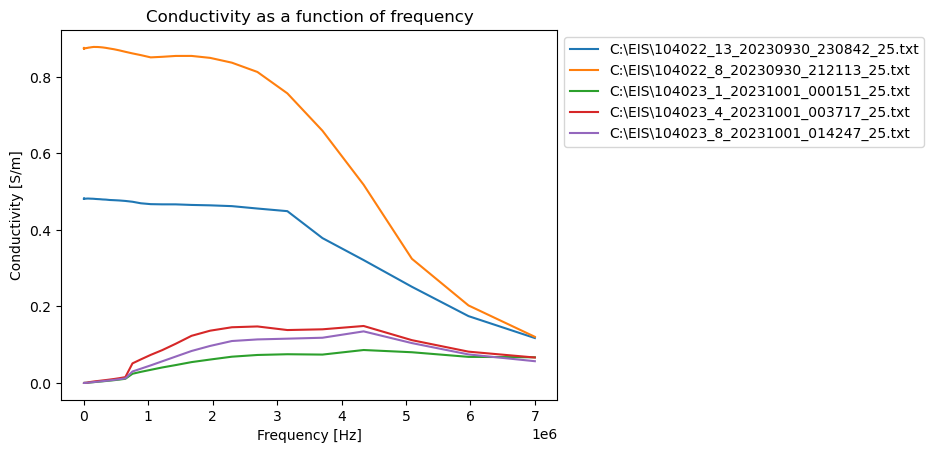

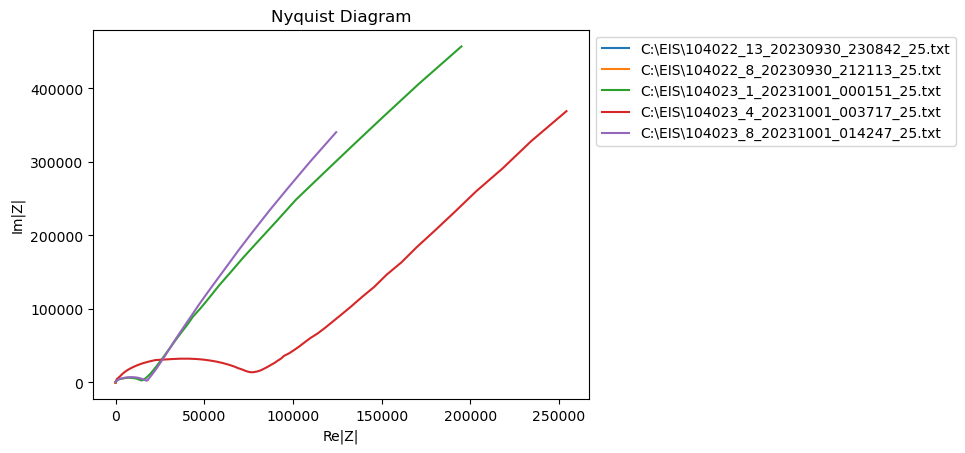

In [66]:
'''
Open and manage data from .txt files
'''

    
bad_data = 0
good_data = 0

for path in useful_path:
    
    # Open the file for reading
    with open(path, 'r') as file:
        
        # Initialize arrays for impedance and conductivity values.
        ReZOhm = []
        ImZOhm = []
        conductivity = []
        i = 0
                
        # Parse each line in the .txt files to the correct array.
        for line in file:
            ZOhm_Values = line.split()
            ReZOhm.append(float(ZOhm_Values[0]))
            ImZOhm.append(float(ZOhm_Values[1]))
            
            # resistivity = resistance (ReZ) * area / length
            # where area = cross-sectional area, length = distance between electrodes
            # These should eventually move to the header tab for user parameters
            diameter = 0.010 # [m] User-input required here
            length = 0.0001 # [m] # User-input
            area = math.pi*diameter**2/4
            # Setting A and l to 1 makes this just conductance
            # area = 1
            # length = 1 
            resistivity = ReZOhm[i] * (area) / length
            conductivity.append(1/resistivity)
            i += 1
            
        ZOhm = []
        ZVector = []
        ZPhase = []
        for i in range(len(ReZOhm)):
            Z_temp = ReZOhm[i] - 1j*ImZOhm[i] # Rearrange into format of array. 
            ZOhm.append(Z_temp)
            ZVector.append(math.sqrt(ReZOhm[i]**2+ImZOhm[i]**2))
            ZPhase.append(math.atan(ImZOhm[i]/ReZOhm[i])*180/math.pi) # Phase in degrees = atan(Im|Z|/Re|Z|)
            
        Z = np.array(ZOhm)
        
        # Create a linear Kronigs-Kramer model to fit data
        try:
            M, mu, Z_linKK, res_real, res_imag = linKK(f, Z, c=.85, max_M=100, fit_type='complex', add_cap=True)
        except:
            print("[XX] Data type and structure error in: ", file.name)
            bad_data += 1
            continue

        Re_residuals_avg = statistics.mean(abs(res_real))
        Im_residuals_avg = statistics.mean(abs(res_imag))
        
        bad_data_threshold = 0.05
        
        # Use linKK to identify which datasets have large residuals. 
        if Re_residuals_avg > bad_data_threshold or Im_residuals_avg > bad_data_threshold:
            print("[XX] High residuals in: ", file.name)
            bad_data += 1
            continue
        else:
            # print("[!!] Residuals are good in: ", file.name)
            good_data += 1
            

        #print("<Re|Z|_linKK - Re|Z|_meas>: ", Re_residuals_avg, "<Im|Z|_linKK - Im|Z|_meas>: ", Im_residuals_avg)

        
            
        '''
        Make figures 
        '''
        if len(frequency) == len(conductivity):
            plt.figure(1)
            plt.plot(frequency, conductivity, label = path)
            plt.title('Conductivity as a function of frequency')
            plt.xlabel('Frequency [Hz]')
            plt.ylabel('Conductivity [S/m]')
            plt.legend(bbox_to_anchor=(1, 1))
            # plt.ylim((0, 10))

            plt.figure(2)
            #plt.loglog(ReZOhm, ImZOhm, label = path) # I know this is unconventional, but it makes it easier to look at multiple lines.
            plt.plot(ReZOhm, ImZOhm, label = path) # I know this is unconventional, but it makes it easier to look at multiple lines.=
            # plt.plot(np.real(Z_linKK), -np.imag(Z_linKK), linestyle = '--', label = path)
            plt.title('Nyquist Diagram')
            plt.xlabel('Re|Z|')
            plt.ylabel('Im|Z|')
            plt.legend(bbox_to_anchor=(1, 1))
            # plt.xlim((0, 250000))
            # plt.ylim((0, 100000))
            
            '''
            plt.figure(3)
            fig, ax1 = plt.subplots()
            plt.title('Bode Plot: Magnitude and Phase as a function of Frequency')
            color = 'tab:blue'
            ax1.set_xlabel('Frequency [Hz]')
            ax1.set_ylabel('Magnitude', color=color)
            ax1.loglog(frequency, ZVector, label = path)
            ax1.tick_params(axis='y', labelcolor=color)

            ax2 = ax1.twinx()
            color = 'tab:red'
            ax2.set_ylabel('Phase', color=color)  # we already handled the x-label with ax1
            ax2.loglog(frequency, ZPhase, color = color)
            ax2.tick_params(axis='y', labelcolor=color)
            '''

        else:
            print("Dimensionality Error in file:" + path + "\nLength of Conductivity Array:" + str(len(conductivity)))


print("Number of Adequate Data Files: ", good_data, "| Number of Poor Data Files: ", bad_data, "| Total Number of Files: ", good_data+bad_data)
    # Testing the magnitude and phase -- Looks good to me
    # print("Magnitude of Z: " + str(ZVector[1]))
    # print("Re|Z|: " + str(ReZOhm[1]) + "Im|Z|: " +str(ImZOhm[1]))
    # print("Phase of Z: " + str(ZPhase[1]))


### Implement Kramers-Kronig Relations for Data Validation
Kramers-Kronig relations work by predicting the real component of a complex number based off of the complex value and the vice versa. In theory this works if the relationships are causal and analytical. 

<Axes: xlabel='$f$ [Hz]', ylabel='$\\Delta$ $(\\%)$'>

<Figure size 640x480 with 0 Axes>

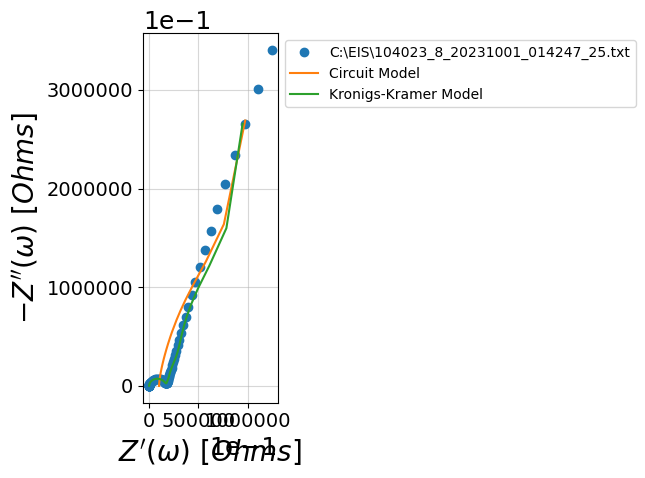

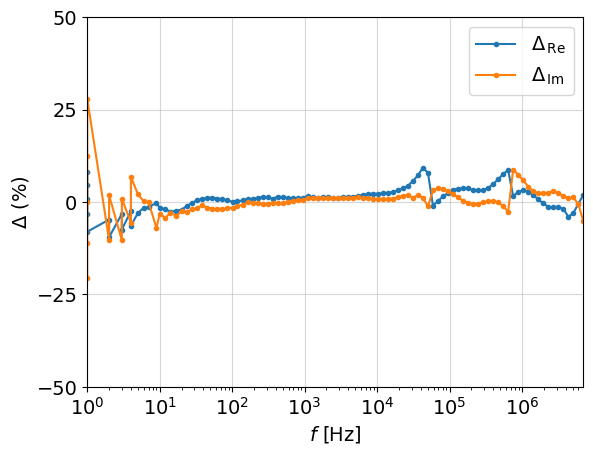

In [68]:
    # Create ECM and fit to the data collected
    circuit = 'R0-p(R1,C1)-p(R2-Wo1,C2)' # ECM. We should match model from system!
    initial_guess = [10**4, 10**0, 10**5, 10**5, 10**5, 10**-1, 10**-10]
    circuit = CustomCircuit(circuit, initial_guess=initial_guess)
    ### The impedance.py documentation uses a much higher order ECM to fit the data, might be worth a try if this doesn't work at first.

        
    # Z = ZOhm
    
    # mask = f < 1000
    # f = f[mask]
    # Z = Z[mask]
    # f, Z = preprocessing.ignoreBelowX(f, Z)
    ### -- Still needs to be understood better! -- ###
    # Fit data to equivalent circuit model
    circuit.fit(f, Z)
    # print(circuit)
    Z_fit = circuit.predict(f)

    # Create Nyquist Plot
    plt.figure(3)
    fig, ax = plt.subplots()
    plot_nyquist(Z, fmt='o', scale=10, ax=ax)
    plot_nyquist(Z_fit, fmt='-', scale=10, ax=ax)
    plot_nyquist(Z_linKK, fmt='-', scale=10, ax=ax)


    plt.legend([path, 'Circuit Model', 'Kronigs-Kramer Model'], bbox_to_anchor=(1, 1))
    
    
    # Plot residuals
    plt.figure(4)
    fig2, ax2 = plt.subplots()
    plot_residuals(ax2, f, res_real, res_imag, y_limits=(-50, 50))
